### Calculate the Word Mover's Distance between two sentences

In [1]:
import gensim.downloader as api
import glob
import sys
import os
import pandas as pd

from tqdm import tqdm

sys.path.append("../../../../utils")
from absolute_path_builder import AbsolutePathBuilder

### Read demographic groups' sentences

In [2]:
buckeye_datapath = AbsolutePathBuilder.get_path(
    "04_buckeye_scored",
    filepaths="../../../../config/filepaths.yaml"
)

df_white = pd.concat(
    [pd.read_csv(file) for file in glob.glob(os.path.join(buckeye_datapath, "*"))]
)

coraal_datapath = AbsolutePathBuilder.get_path(
    "04_coraal_scored",
    filepaths="../../../../config/filepaths.yaml"
)

df_black = pd.concat(
    [pd.read_csv(file) for file in glob.glob(os.path.join(coraal_datapath, "*"))]
)

---
### Load embedding model

In [3]:
# embedding_model = api.load("glove-wiki-gigaword-50")
embedding_model = api.load("word2vec-google-news-300")

In [4]:
df_white = df_white.iloc[:100]
df_black = df_black.iloc[:100]

In [5]:
import numpy as np

data = []
distances = []
for _, row_white in tqdm(df_white.iterrows(), total=df_white.shape[0]):

    closest_row_black = None
    closest_dist = np.inf
    for _, row_black in df_black.iterrows():
        cur_distance = embedding_model.wmdistance(row_white.text, row_black.text)

        if(cur_distance < closest_dist):
            closest_dist = cur_distance
            closest_row_black = row_black

    closest_row_black.index = [f"{name}_black" for name in closest_row_black.index]
    concatenated_row = pd.concat([closest_row_black, row_white])
    
    data.append(concatenated_row)
    distances.append(closest_dist)

100%|███████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.63it/s]


In [6]:
df_wmd = pd.DataFrame(data)
df_wmd["wmd"] = distances

df_wmd = df_wmd.reset_index(drop=True)

In [7]:
output_path = AbsolutePathBuilder.get_path(
    f"07_word_mover_distance",
    filepaths="../../../../config/filepaths.yaml"
)

df_wmd.to_csv(os.path.join(output_path, "buckeye_vs_coraal_wmd.csv"), index=False)

/home/guilherme/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/guilherme/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


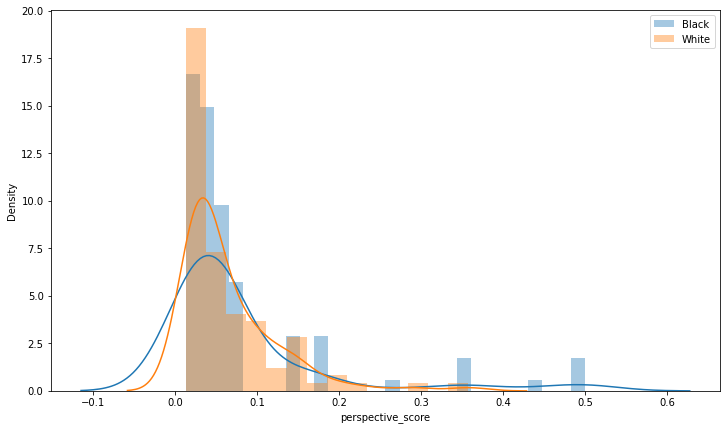

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,7))

sns.distplot(df_wmd.perspective_score_black, label="Black")
sns.distplot(df_wmd.perspective_score, label="White")

plt.legend()
plt.show()

/home/guilherme/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


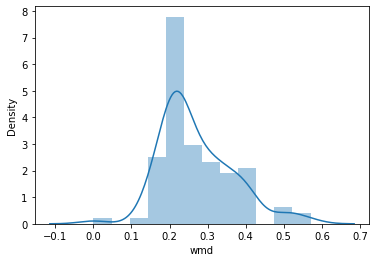

In [9]:
sns.distplot(df_wmd.wmd)
plt.title("")
plt.show()